<a href="https://colab.research.google.com/github/kywch/StreetPsych/blob/master/visualize_expert_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment setup

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.cbook import flatten
from matplotlib import colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
# download the ratings data
!wget https://github.com/kywch/StreetPsych/raw/master/street_psych_ratings.zip

--2020-11-24 16:21:54--  https://github.com/kywch/StreetPsych/raw/master/street_psych_ratings.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kywch/StreetPsych/master/street_psych_ratings.zip [following]
--2020-11-24 16:21:54--  https://raw.githubusercontent.com/kywch/StreetPsych/master/street_psych_ratings.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 437066 (427K) [application/zip]
Saving to: ‘street_psych_ratings.zip’

street_psych_rating 100%[===================>] 426.82K  --.-KB/s    in 0.04s   

2020-11-24 16:21:54 (9.44 MB/s) - ‘street_psych_ratings.zip’ saved [437066/437066]



In [3]:
#!ls
!unzip street_psych_ratings.zip
!mv 02_derivatives/ data

Archive:  street_psych_ratings.zip
  inflating: 02_derivatives/Expert1_score_choice_probability.csv  
  inflating: 02_derivatives/Expert1_score_trueskill.csv  
  inflating: 02_derivatives/Expert2_score_choice_probability.csv  
  inflating: 02_derivatives/Expert2_score_trueskill.csv  
  inflating: 02_derivatives/Expert3_score_choice_probability.csv  
  inflating: 02_derivatives/Expert3_score_trueskill.csv  
  inflating: 02_derivatives/Mturk_score_choice_probability.csv  
  inflating: 02_derivatives/Mturk_score_reliability.csv  
  inflating: 02_derivatives/Mturk_score_trueskill.csv  


In [4]:
!ls data

Expert1_score_choice_probability.csv  Expert3_score_trueskill.csv
Expert1_score_trueskill.csv	      Mturk_score_choice_probability.csv
Expert2_score_choice_probability.csv  Mturk_score_reliability.csv
Expert2_score_trueskill.csv	      Mturk_score_trueskill.csv
Expert3_score_choice_probability.csv


# Load the ratings data

To see and sort the images by these ratings, visit
* Mturk ratings: https://kywch.github.io/StreetPsych/visualize.html
* Ratings by Expert 1: https://kywch.github.io/StreetPsych/visualize_expert1.html
* Ratings by Expert 2: https://kywch.github.io/StreetPsych/visualize_expert2.html
* Ratings by Expert 3: https://kywch.github.io/StreetPsych/visualize_expert3.html

Note that there are two different ratings. Choice probability ratings are more intuitive but skewed and discrete. TrueSkill ratings are less intuitive but more fine-grained and more normal.
* **Choice Probability**: In each trial, participants were shown 12 images in a 4x3 grid and asked to choose four images that they evaluate highly on that dimension/question. The probability of selecting each image across participants, i.e., choice probability, was used to quantify how much that image represented that dimension.  
* **TrueSkill**: The score is calculated by transforming clicks into winner (clicked) -- loser (not clicked) pairs then feeding those into the TrueSkill algorithm. http://www.moserware.com/2010/03/computing-your-skill.html, https://trueskill.org/ 


In [5]:
mturk_data = pd.read_csv('data/Mturk_score_trueskill.csv', index_col='Image_ID')
expert1_data = pd.read_csv('data/Expert1_score_trueskill.csv', index_col='Image_ID')
expert2_data = pd.read_csv('data/Expert2_score_trueskill.csv', index_col='Image_ID')
expert3_data = pd.read_csv('data/Expert3_score_trueskill.csv', index_col='Image_ID')

# Correlations between Mturk ratings (TrueSkill)

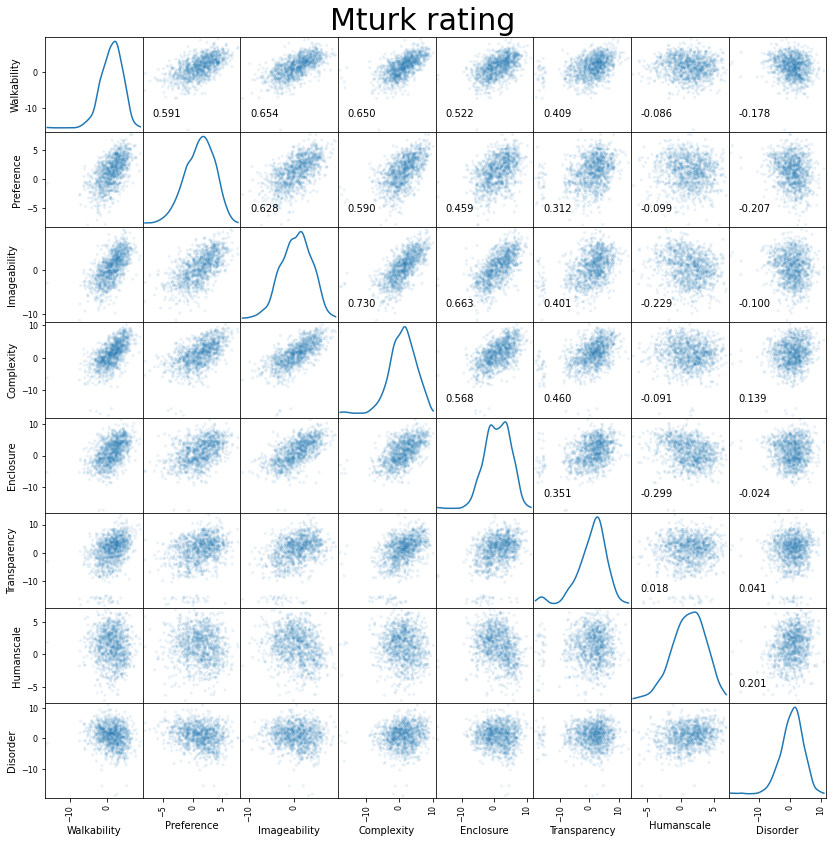

In [6]:
# Mturk rating
axes = scatter_matrix(mturk_data, alpha=0.1, figsize=(14,14), diagonal='kde')
corr = mturk_data.corr(method='spearman')
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr.iloc[i,j], (0.1, 0.2), xycoords='axes fraction', ha='left', va='center')
plt.suptitle('Mturk rating', y=0.91, fontsize=30)
plt.show()

# Between-expert rating agreements (TrueSkill)


## Defining the plotting function

In [35]:
def compare_ratings(base_df, base_name, comp_dfs, comp_names, col_list, 
                    base_lim = None, comp_lim = None, figsize = (18,3)):
  fig, ax = plt.subplots(len(comp_dfs), len(col_list), figsize=figsize)
  fig.subplots_adjust(wspace=.4, hspace=.4)

  if len(comp_dfs) == 1:
    ax = np.reshape(ax, (len(comp_dfs), len(col_list)))

  for irow, comp_df in enumerate(comp_dfs):
    for idx, col in enumerate(col_list):
      sns.regplot(x=base_df[col], y=comp_df[col], 
                  scatter_kws = {'alpha':0.1, 'edgecolors':None },
                  line_kws = {'color':'k'},
                  ax=ax[irow, idx])
      
      # set x, y limits
      if base_lim is not None:
        ax[irow,idx].set_xlim(base_lim)

      if comp_lim is not None:  
        ax[irow,idx].set_ylim(comp_lim)
      
      #ax[irow, idx].set_aspect('equal')

      # correlation
      rho = base_df[col].corr(comp_df[col], method='spearman')
      ax[irow, idx].annotate("%.3f" % rho, (0.05, 0.85), xycoords='axes fraction', ha='left', va='center', fontsize=16)

      # title, axis labels  
      if irow == 0:
        ax[irow, idx].set_title(col, fontsize=16)
        
      if idx == 0:
        ax[irow, idx].set_xlabel(base_name, fontsize=16)
        ax[irow, idx].set_ylabel(comp_names[irow], fontsize=16)
      else:
        ax[irow, idx].set_xlabel('')
        ax[irow, idx].set_ylabel('')

      # Move left and bottom spines outward by 10 points
      ax[irow, idx].spines['left'].set_position(('outward', 5))
      ax[irow, idx].spines['bottom'].set_position(('outward', 5))
      # Hide the right and top spines
      ax[irow, idx].spines['right'].set_visible(False)
      ax[irow, idx].spines['top'].set_visible(False)


## Experts 1 vs 2 & 3

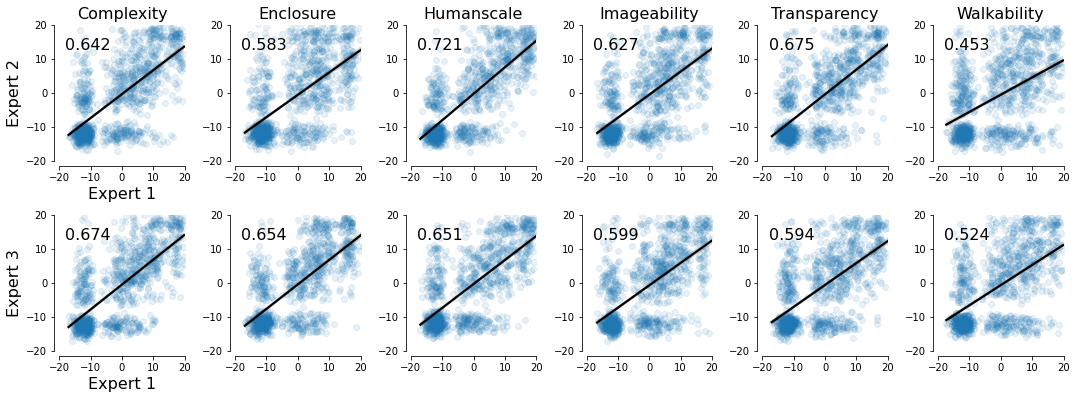

In [33]:
compare_ratings(base_df = expert1_data, base_name = 'Expert 1', base_lim = (-20,20),
                comp_dfs = [expert2_data, expert3_data], comp_names = ['Expert 2', 'Expert 3'], comp_lim = (-20,20),
                col_list = list(expert1_data.columns), figsize = (18,6))

## Experts 2 vs 3

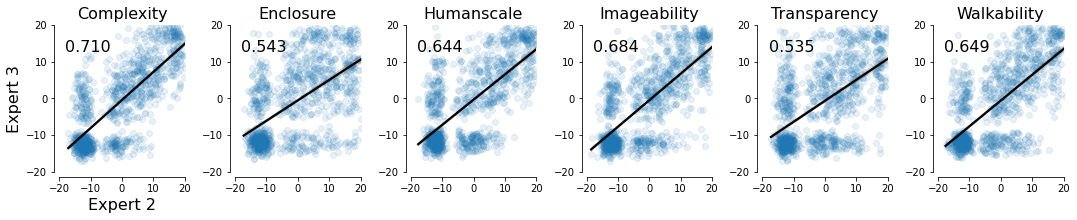

In [38]:
compare_ratings(base_df = expert2_data, base_name = 'Expert 2', base_lim = (-20,20),
                comp_dfs = [expert3_data], comp_names = ['Expert 3'], comp_lim = (-20,20),
                col_list = list(expert2_data.columns), figsize = (18,2.7))

# Mturk-expert rating agreements (TrueSkill)

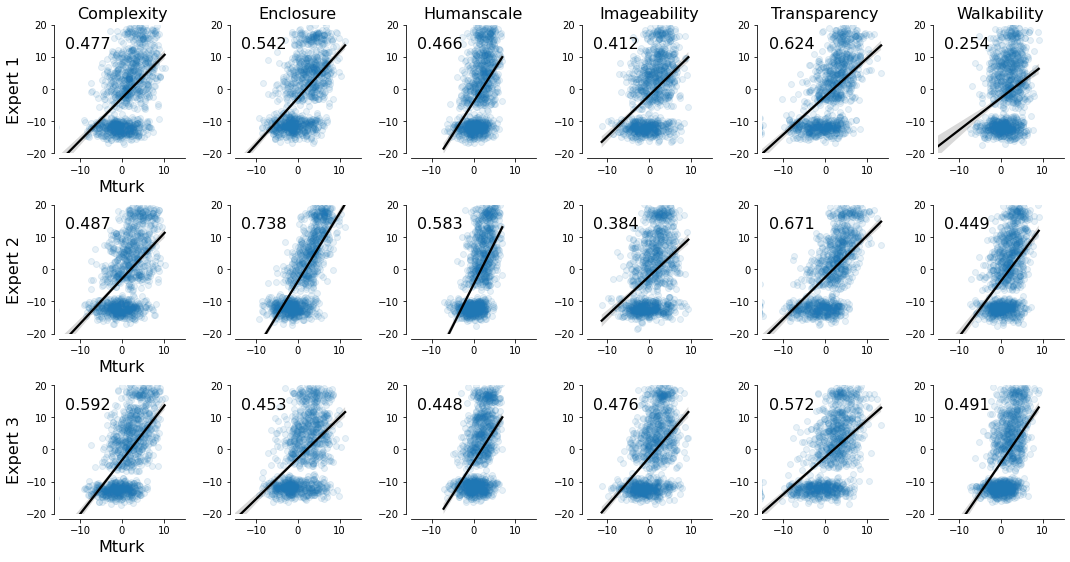

In [40]:
compare_ratings(base_df = mturk_data, base_name = 'Mturk', base_lim=(-15,15),
                comp_dfs = [expert1_data, expert2_data, expert3_data],
                comp_names = ['Expert 1', 'Expert 2', 'Expert 3'], comp_lim=(-20,20),
                col_list = list(expert1_data.columns), figsize = (18, 9))

# Mturk split-participant vs. between-expert agreements